### Problem statement : 

How salary is varying with respect to other considerable factors.

### Breif understanding of the HR industry 

Human resources (HR) is the division of an organization that is responsible for finding, screening, recruiting, and training job applicants, and administering employee-benefit programs.

This management is the strategic approach to the efficient management of people in any organization in a way that can help their business gain a competitive advantage. It is designed to improve employee performance in service of an employer's strategic objectives.

### Feature description

The dataset given to us consists of employee data of an organization the following are the features present in the dataset:
    
   Gender - talks of the gender - Male or female
   
   Business - if the person has a business or no
   
   Age - age of the person
   
   Salary - CTC of the employee
   
   Dependants - number of people dependant on the person
   
   Months - duration of the person employed with the company
   
   Calls - if the person has authority to make calls or not
   
   Type - salary settlement type
   
   Billing - Subscribed to billing plans or no.
   
   Unit sales - unit sale made by the person
   
   Total sales - total sales made by the person
   
   Rating - If he/She has been given a rating by a superior or no
   
   Bonus - amount received by a person as bonus for sales
   
   Base pay - Base pay of the employee
   "the basic amount of money that someone is paid for doing a job, not including any extra amounts such as overtime payments or     bonuses is called base pay."
   
   Unit price - The Unit price of a sale
   
   Volume - volume allotted to a person
   
   Opening balance - The opening balance of an employee
   " the opening balance of an account is the amount of money, negative or positive, in the account at the start of the
     accounting period."
     
   Low - lowest balance allotted to a person.
   
   Closing Balance- The closing balance of an employee
   
   "closing balance is the positive or negative amount remaining in an account at the conclusion of an accounting period."
   
   Education- Educational background of an employee
    
By using the above data we have to identify how salary is varying with respect to other considerable factors.
As per my understanding Gender,Business and dependants wont effect the salary.


### importing required libraries

In [1]:
import numpy as np                               #for numerical calculations

import pandas as pd                              #for generic operations like analysis, cleaning, manipulation

import matplotlib.pyplot as plt                  #for visualization

import seaborn as sns                            #for visualization

import pingouin as pg                            #for statistical approches

from scipy import stats                          #for statistical approches

plt.rcParams['figure.figsize'] = (10, 6)         #setting the default figure size for all plots through out the analysis

### importing given dataset

In [2]:
#here I have imported the dataset and stored it to dataframe df

df = pd.read_csv("New_data_Set.csv")


In [3]:
#here I have used head function to show first 2 rows of the dataset

df.head(2)


,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.450,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.906,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less


In [4]:
#here I have used tail function to show last 2 rows of the dataset

df.tail(2)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.535,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG
4999,Male,0,Yes,Yes,Two year,Yes,No,88,199970.74,79988.296,9998.537,627.839984,6003300,NaN,312.307316,311.081089,118.75,,72,PG


In [5]:
#here I have used shape function to get the shape of entire dataset

df.shape

#In the output we can see that 5000 rows and 20 columns are there in dataset


(5000, 20)

In [6]:
#here I have used info function to check the datatypes of columns and non null value count


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

### Summary

This data is based on Hr department for deciding the salary using different factors available. There are 5000 rows and 20 features, out of which 8 are categorical features and 12 are numerical features. But as we see above total_sales column is in object form we have to change that. There are null values present in three columns we have to deal with them. We need to perform data cleansing, data pre processing and EDA part to visualize the inferences from the data to make data driven decision.

In [7]:
#here I have used isna function to check the percentage of nullvalues

df.isna().sum()*100/len(df)

Gender             0.00
Business           0.00
Dependancies       0.00
Calls              0.00
Type               0.00
Billing            0.00
Rating             0.00
Age                0.00
Salary             0.00
Base_pay           0.46
Bonus              0.00
Unit_Price         0.00
Volume             0.00
openingbalance    29.52
closingbalance     0.00
low                0.00
Unit_Sales         0.00
Total_Sales        0.16
Months             0.00
Education          0.00
dtype: float64

Base_pay, openingbalace, Total_Sales columns have null values. We have to treat these null values.

Base_pay and Total_Sales columns have very low percentage of null values so I'm dropping them.

opening balance column has outliers so I'm replacing them with median.

In [8]:
#dropping null values from two columns

df.dropna(subset=['Base_pay','Total_Sales'],inplace=True)

In [9]:
#calculating median value for opening balance and filling null values with it

m = df['openingbalance'].median()  

df['openingbalance'].fillna(m,inplace=True)

In [10]:
#Again checking for null values

df.isna().sum()

Gender            0
Business          0
Dependancies      0
Calls             0
Type              0
Billing           0
Rating            0
Age               0
Salary            0
Base_pay          0
Bonus             0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       0
Months            0
Education         0
dtype: int64

There are no null values in the dataset. we can go for further analysis.

Total_Sales is in object datatype I'm going to change that to float by using to_numeric function.

There are some empty string values present in the column. It will give error while running the code.

I have used errors = coerce it will replace those empty string to null values.


In [11]:
#here I have used to_numeric function to change the datatype

df['Total_Sales'] = pd.to_numeric(df['Total_Sales'],errors = 'coerce')

In [12]:
#Here I have used dtypes function to check the datatypes of columns

df.dtypes

Gender             object
Business            int64
Dependancies       object
Calls              object
Type               object
Billing            object
Rating             object
Age                 int64
Salary            float64
Base_pay          float64
Bonus             float64
Unit_Price        float64
Volume              int64
openingbalance    float64
closingbalance    float64
low               float64
Unit_Sales        float64
Total_Sales       float64
Months              int64
Education          object
dtype: object

All coumns are in their respective datatypes no need to change them.

In [62]:
df.isna().sum()

Gender                0
Business              0
Dependancies          0
Calls                 0
Type                  0
Billing               0
Rating                0
Age                   0
Salary                0
Base_pay              0
Bonus                 0
Unit_Price            0
Volume                0
openingbalance        0
closingbalance        0
low                   0
Unit_Sales            0
Total_Sales           8
Months                0
Education             0
unitprice_log         0
volume_log            0
openingbalance_log    0
closingbalance_log    0
low_log               0
dtype: int64

Total Sales column has 8 null values I'm dropping them

In [63]:
#Using dropna function to drop null values in totalsales

df.dropna(subset=['Total_Sales'],inplace=True)

In [64]:
#printing unique values present in each column

print('unique values in Gender:',df['Gender'].unique(),'\n') 
                                             
print('unique values in Dependancies:',df['Dependancies'].unique(),'\n')
                                            
print('unique values in Business:',df['Business'].unique(),'\n')
                                           
print('unique values in Calls:',df['Calls'].unique(),'\n')
                                          
print('unique values in Billing:',df['Billing'].unique(),'\n')
                                             
print('unique values in Rating:',df['Rating'].unique(),'\n')
                                             
print('unique values in Type:',df['Type'].unique(),'\n')
                                           
print('unique values in Education:',df['Education'].unique(),'\n')

unique values in Gender: ['Female' 'Male'] 

unique values in Dependancies: ['No' 'Yes'] 

unique values in Business: [0 1] 

unique values in Calls: ['Yes' 'No'] 

unique values in Billing: ['No' 'Yes'] 

unique values in Rating: ['Yes' 'No'] 

unique values in Type: ['Month-to-month' 'Two year' 'One year'] 

unique values in Education: ['High School or less' 'Intermediate' 'Graduation' 'PG'] 



In [65]:
#checking for duplicates in the dataset

df.duplicated().sum()

#by observing the output we can state that there are no duplicates present in the dataset


0

In [66]:
#here I have used describe function to check the basic statistical values

df.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,unitprice_log,volume_log,openingbalance_log,closingbalance_log,low_log
count,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4.961000e+03,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000
mean,0.160250,51.881072,99958.298698,40008.895192,4997.914935,50.617058,6.762826e+06,40.913596,43.350737,42.780688,64.995253,2282.786192,32.280589,3.668174,14.892898,3.524273,3.526911,3.516215
std,0.366875,8.509788,24946.716919,10031.682829,1247.335846,48.096732,1.626007e+07,32.660123,35.986575,35.219401,29.978967,2267.794344,24.569804,0.710566,1.210580,0.584640,0.684476,0.680450
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.250000,18.800000,0.000000,0.364643,8.216088,1.302913,1.302913,1.294727
25%,0.000000,47.000000,84302.567720,33721.027090,4215.128386,25.840000,1.279900e+06,26.600000,22.100000,21.850000,36.000000,399.600000,9.000000,3.251924,14.062371,3.280911,3.095578,3.084201
50%,0.000000,52.000000,100667.831800,40267.132730,5033.391590,39.310001,2.860300e+06,33.320000,33.380001,32.982074,70.550000,1404.650000,29.000000,3.671479,14.866926,3.506158,3.507957,3.495964
75%,0.000000,57.000000,116911.794500,46764.717780,5845.589725,58.700001,6.205100e+06,42.740002,51.139999,50.410000,89.950000,3767.400000,55.000000,4.072440,15.640882,3.755135,3.934567,3.920190
max,1.000000,88.000000,169149.707000,72278.720000,8457.485350,610.001045,3.208684e+08,313.903904,313.688694,307.399994,117.150000,8684.800000,72.000000,6.413461,19.586542,5.749087,5.748401,5.728150


To apply regression algorithm our data has to be normally distributed. 

To check whether our data is normally distributed or not I'm going to find skewness of the data.

Skewness is a measure of the symmetry of a distribution. A distribution is skewed if the tail on one side of the mode is fatter or longer than on the other.

To check skewness I'm going to use agg function skew.

In [67]:
#here I have used agg function skew to find the skewness of data

df.agg(['skew']).transpose()

,skew
Business,1.852878
Age,-0.298803
Salary,-0.452218
Base_pay,-0.416435
Bonus,-0.452218
Unit_Price,5.629375
Volume,8.688294
openingbalance,4.081133
closingbalance,3.118025
low,3.039417


The following are the measures of skewness to find symmetry.

fairly symmetrical   -0.5 to 0.5

Moderately skewed    -0.5 to -1 and 0.5 to 1

Highly skewed        <-1.0 to >1.0

Business, Unit_Price, Volume, openingbalance, closingbalance, low, Total_Sales are Highly skewed.

Age, Salary, Base_pay, Bonus, Unit_Sales, Months are fairly symmetrical.

I'm going to use log transformation to make skewed data to symmetrical data as well as to treat outliers.

We can't drop the outliers as it will effect the further analysis so I'm using log transformation to treat them.

<AxesSubplot:>

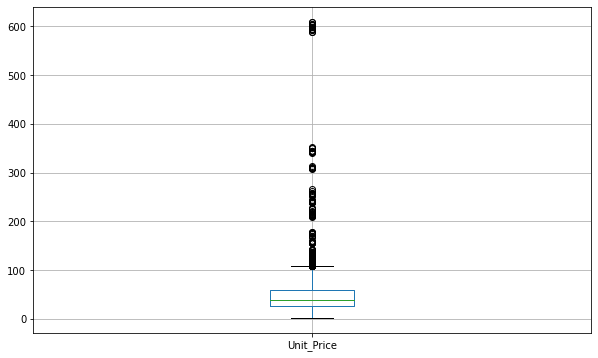

In [68]:
#Here I have used box plot to check for outliers of Unit_price column

df.boxplot(column=['Unit_Price'])

<AxesSubplot:xlabel='Unit_Price', ylabel='Count'>

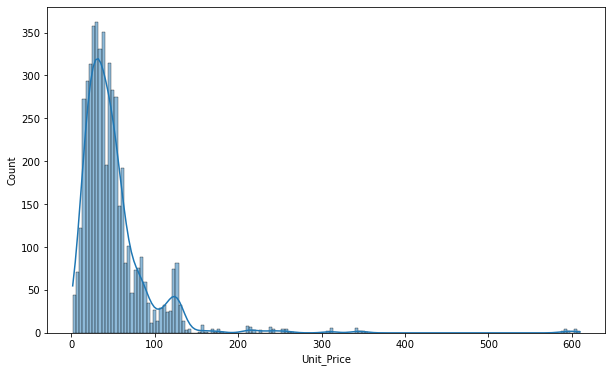

In [69]:
#Here I have used histplot to check the distribution of Unit_price

sns.histplot(df['Unit_Price'], kde = True)

By observing above figures we can state that the data is right skewed because of outliers.

So I'm using log transformation to make it symmetric.

In [70]:
#Here I have used np.log function to transform it to symmetric data

df['unitprice_log'] = np.log(df['Unit_Price'])

<AxesSubplot:>

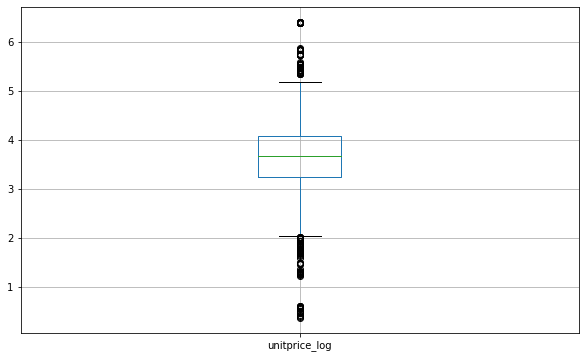

In [71]:
#here again I have used boxplot to check whether the data changed or not

df.boxplot(column=['unitprice_log'])

The outliers are present in the data even after log transformation but the distribution changed to symmetric.

<AxesSubplot:>

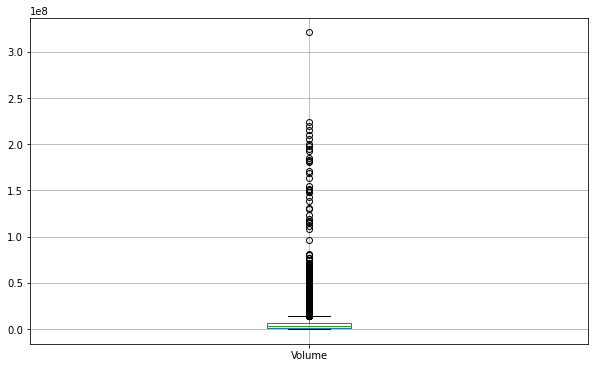

In [72]:
#Here I have used box plot to check for outliers of Volume column

df.boxplot(column=['Volume'])

By observing above figures we can state that the data is right skewed because of outliers.

So I'm using log transformation to make it symmetric.

In [73]:
#Here I have used np.log function to transform it to symmetric data

df['volume_log'] = np.log(df['Volume'])

C:\Users\ALEKHYA\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

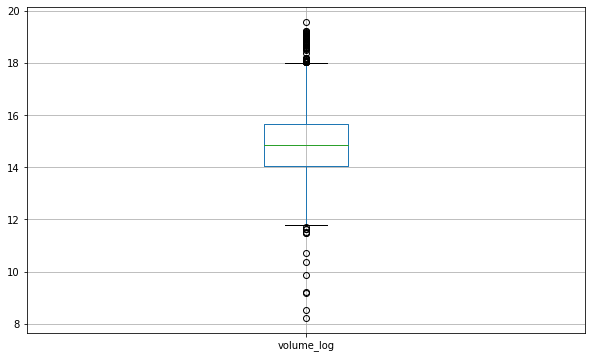

In [74]:
#here again I have used boxplot to check whether the data changed or not

df.boxplot(column=['volume_log'])

The outliers are present in the data even after log transformation but the distribution changed to symmetric.

<AxesSubplot:>

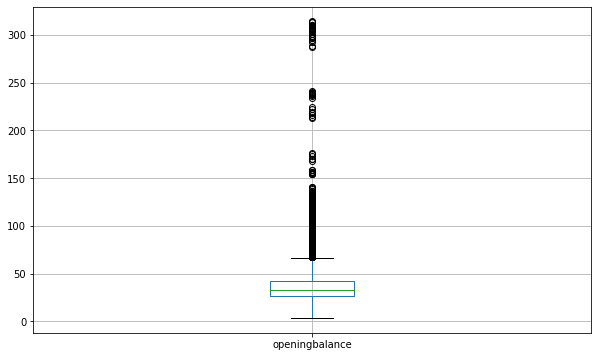

In [75]:
#Here I have used box plot to check for outliers of openingbalance column

df.boxplot(column=['openingbalance'])

By observing above figures we can state that the data is right skewed because of outliers.

So I'm using log transformation to make it symmetric.

In [76]:
#Here I have used np.log function to transform it to symmetric data

df['openingbalance_log'] = np.log(df['openingbalance'])

<AxesSubplot:>

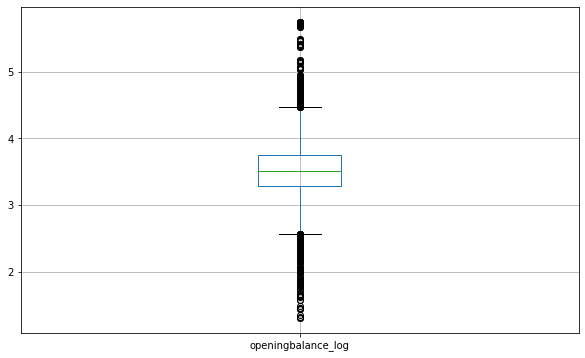

In [77]:
#here again I have used boxplot to check whether the data changed or not

df.boxplot(column=['openingbalance_log'])

The outliers are present in the data even after log transformation but the distribution changed to symmetric.

<AxesSubplot:>

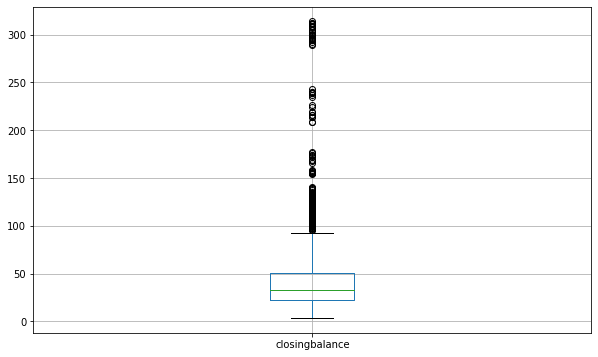

In [78]:
#Here I have used box plot to check for outliers of closingbalance column

df.boxplot(column=['closingbalance'])

By observing above figures we can state that the data is right skewed because of outliers.

So I'm using log transformation to make it symmetric.

In [79]:
#Here I have used np.log function to transform it to symmetric data

df['closingbalance_log'] = np.log(df['closingbalance'])

<AxesSubplot:>

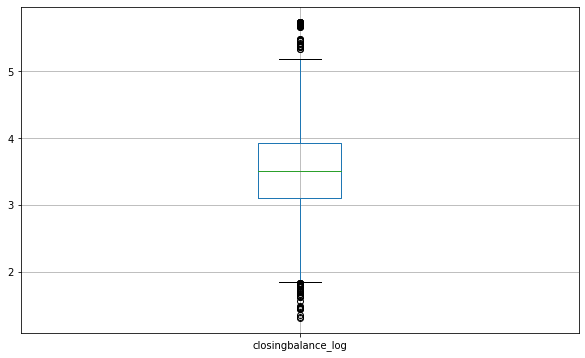

In [80]:
#here again I have used boxplot to check whether the data changed or not

df.boxplot(column=['closingbalance_log'])

The outliers are present in the data even after log transformation but the distribution changed to symmetric.

<AxesSubplot:>

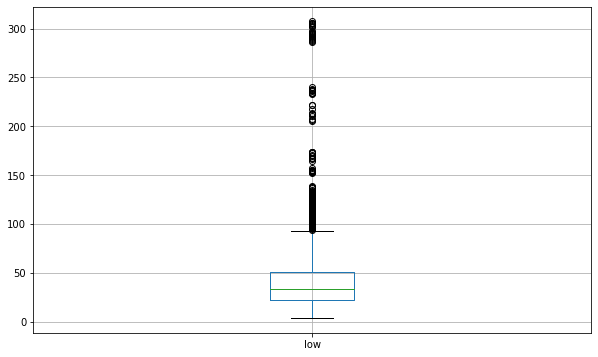

In [81]:
#Here I have used box plot to check for outliers of low column

df.boxplot(column=['low'])

By observing above figures we can state that the data is right skewed because of outliers.

So I'm using log transformation to make it symmetric.

In [82]:
#Here I have used np.log function to transform it to symmetric data

df['low_log'] = np.log(df['low'])

<AxesSubplot:>

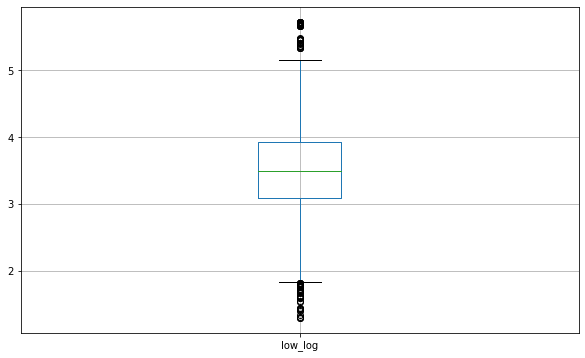

In [83]:
#here again I have used boxplot to check whether the data changed or not

df.boxplot(column=['low_log'])

The outliers are present in the data even after log transformation but the distribution changed to symmetric.

In [84]:
#here I have used spearman correlation to check the correlation between numerical variables

def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(15,10))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

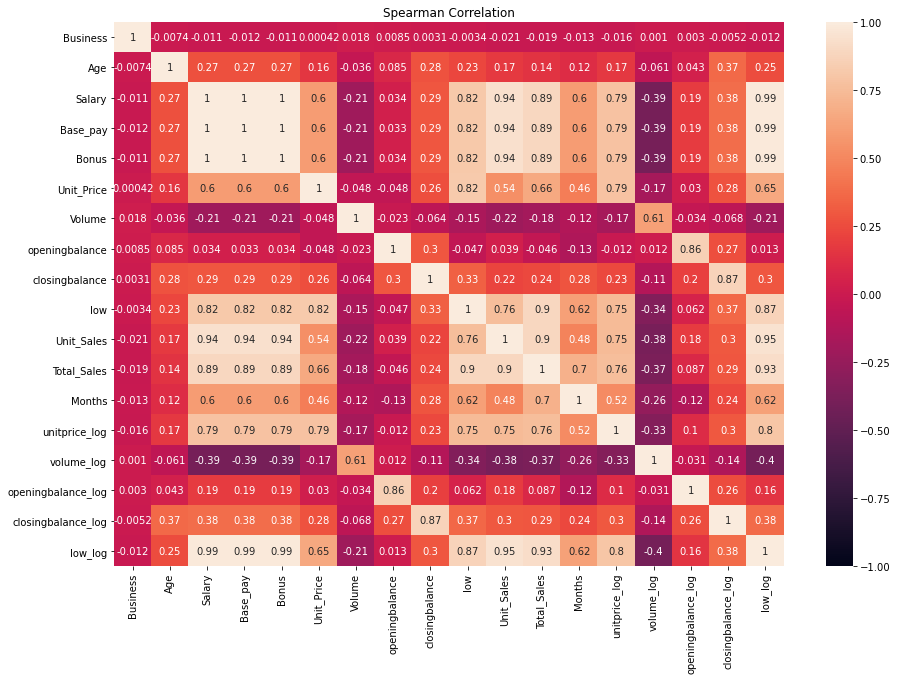

In [85]:
#displaying spearman correlation heatmap

r_simple=display_correlation(df)

Our target variable is Salary.

base_pay, Bonus, Unit_price, low, Unit_Sales, Total_Sales, Months are strongly correlated to salary.

openingbalance, closingbalance are also correlated to salary.

Volume is negatively correlated to Salary.

all numeric variables posses linear relationship with target variable.


There is a infinity value in volume_log column we can't run the model with it.

I'm going to replace intifinity values to null value.

and replacing null value to mean.

In [94]:
#replacing infinity to null value by using replace function

df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [95]:
#checking for null values by using isna function

df.isna().sum()

Gender                0
Business              0
Dependancies          0
Calls                 0
Type                  0
Billing               0
Rating                0
Age                   0
Salary                0
Base_pay              0
Bonus                 0
Unit_Price            0
Volume                0
openingbalance        0
closingbalance        0
low                   0
Unit_Sales            0
Total_Sales           0
Months                0
Education             0
unitprice_log         0
volume_log            1
openingbalance_log    0
closingbalance_log    0
low_log               0
dtype: int64

In [96]:
#volume_log has null value in it replacing it with mean value

mean_value=df['volume_log'].mean()

df['volume_log'].fillna(value = mean_value, inplace=True)

In [97]:
#Again checking for null values in the dataset 

df.isna().sum()

Gender                0
Business              0
Dependancies          0
Calls                 0
Type                  0
Billing               0
Rating                0
Age                   0
Salary                0
Base_pay              0
Bonus                 0
Unit_Price            0
Volume                0
openingbalance        0
closingbalance        0
low                   0
Unit_Sales            0
Total_Sales           0
Months                0
Education             0
unitprice_log         0
volume_log            0
openingbalance_log    0
closingbalance_log    0
low_log               0
dtype: int64

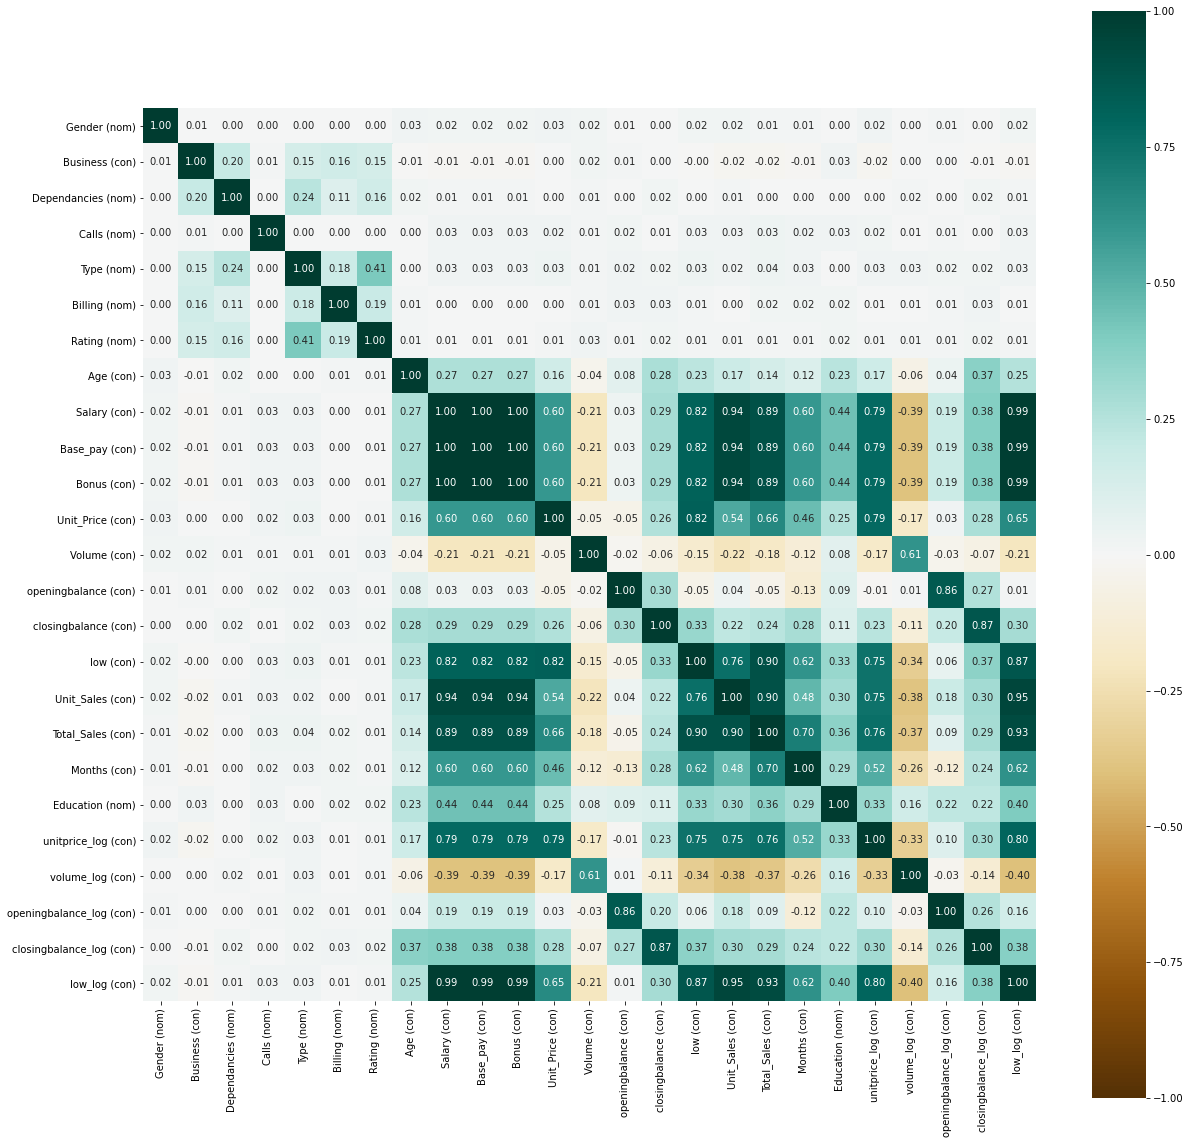

{'corr':                           Gender (nom)  Business (con)  Dependancies (nom)  \
 Gender (nom)                  1.000000        0.005787            0.000000   
 Business (con)                0.005787        1.000000            0.195442   
 Dependancies (nom)            0.000000        0.195442            1.000000   
 Calls (nom)                   0.000000        0.010534            0.000000   
 Type (nom)                    0.000000        0.146447            0.241030   
 Billing (nom)                 0.000000        0.156300            0.108436   
 Rating (nom)                  0.002167        0.147175            0.161192   
 Age (con)                     0.025434       -0.007391            0.017969   
 Salary (con)                  0.021337       -0.011353            0.012738   
 Base_pay (con)                0.021305       -0.011682            0.013443   
 Bonus (con)                   0.021337       -0.011353            0.012738   
 Unit_Price (con)              0.026027     

In [98]:
#I'm using nominal from dython to check check correlation of nominal as well as numerial variables

from dython import nominal      

nominal.associations(df,figsize=(20,20),fmt='.2f',mark_columns=True,cmap='BrBG')
                         

From the above two figures 

Base_pay, Bonus, Unit price, low, Unit sales, Total sales, months, education are  highly correlated to salary.






### Visual Interpretation

Gender
Male      2504
Female    2457
dtype: int64


C:\Users\ALEKHYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

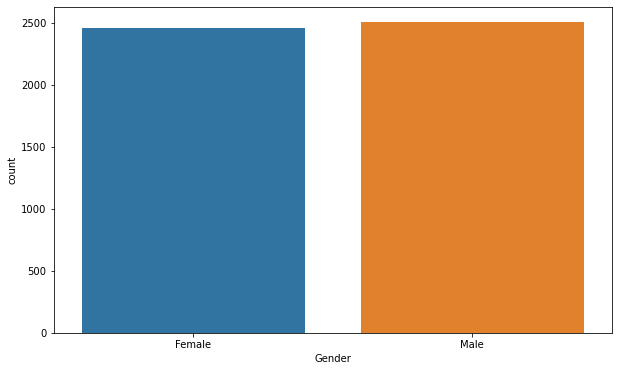

In [132]:
#using values counts to check gender count

print(df.value_counts(['Gender']))

sns.countplot(df['Gender'])


Male population is slightly higher than female the difference is very low.

<AxesSubplot:xlabel='Gender'>

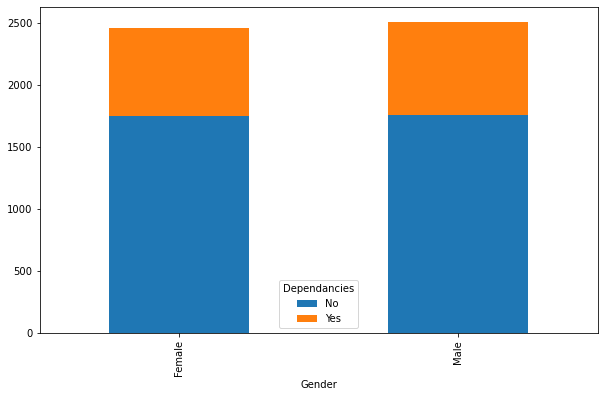

In [133]:
#Using crosstab and barplot to visualize the dependancies on gender column

pd.crosstab(df.Gender, df.Dependancies).plot.bar(stacked=True)

Not dependents on male and female are almost equal.

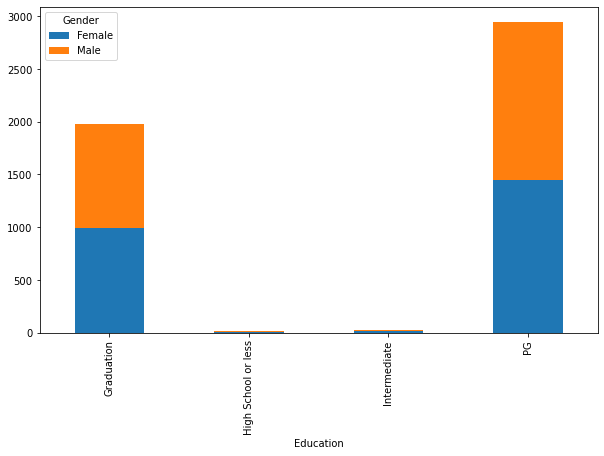

In [134]:
#Using crosstab and barplot to visualize the Education on Gender column.

pd.crosstab(df.Education, df.Gender).plot.bar(stacked=True);

We can infer that most of the employees are pg degree holders in the company

C:\Users\ALEKHYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

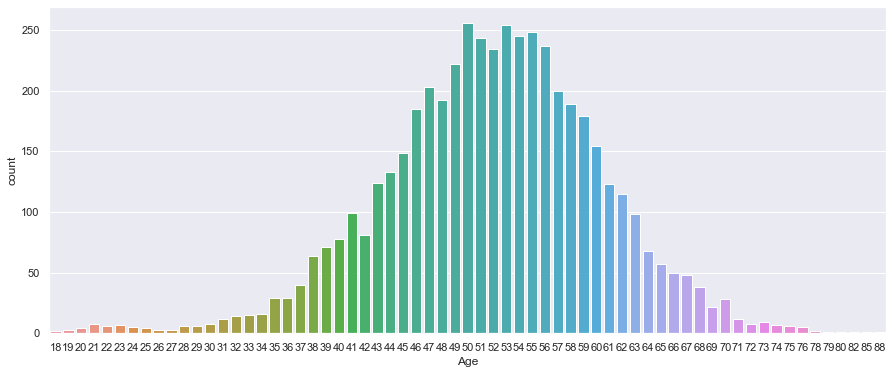

In [139]:
#using countplot to check distribution of age of employees

sns.set(rc={"figure.figsize":(15, 6)})

sns.countplot(df['Age'])

most employees are between 40 to 63 in the age group.  Very few are freshers. after 63 it's the retairment age for most of the employees .

<AxesSubplot:xlabel='count', ylabel='Type'>

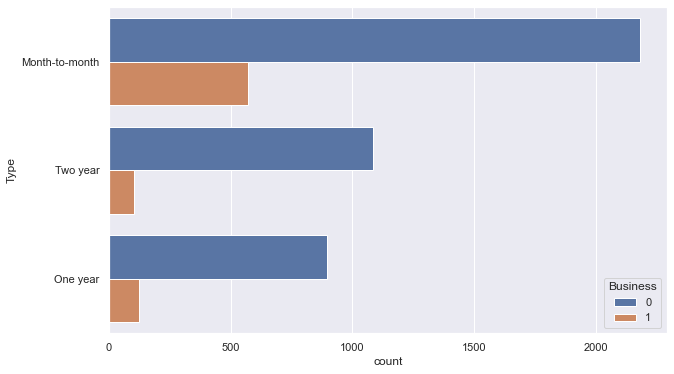

In [141]:
#using countplot for type of salary and business based on month,year using seaborn

sns.set(rc={"figure.figsize":(10, 6)})

sns.countplot(y='Type',hue='Business',data=df)

most of the people preferred to get monthly salary and those doesn't have any business.

<AxesSubplot:xlabel='Rating'>

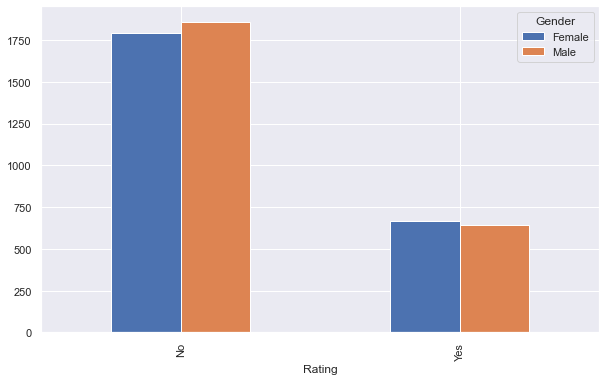

In [147]:
#Using crosstab and barplot to visualize the Rating based on Gender column.

pd.crosstab(df.Rating, df.Gender).plot.bar()

Number of persons getting rating are less. Female are getting ratings over male because of their productive work. 

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

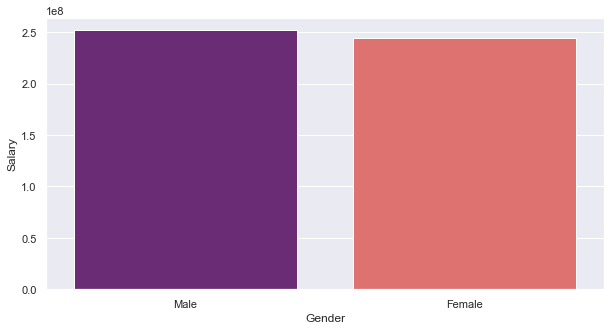

In [142]:
#we are using groupby function to get the required output

a = df.groupby('Gender').sum().sort_values('Salary', ascending = False)

plt.figure(figsize = (10 , 5))

#we are plotting barplot to get the which gender got highest salary

sns.barplot(x = a.index, y = a['Salary'], palette = 'magma')


Salary won't effect by Gender. Male got slightly higher salary than female.

<AxesSubplot:xlabel='Education', ylabel='Salary'>

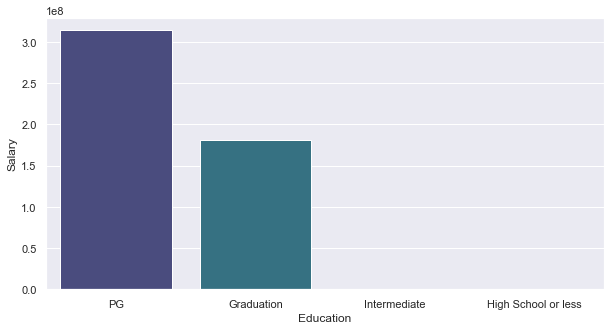

In [143]:
#we are using groupby function to get the required output

b = df.groupby('Education').sum().sort_values('Salary', ascending = False)

plt.figure(figsize = (10 , 5))

#we are plotting barplot to get which education gor highest salary

sns.barplot(x = b.index, y = b['Salary'], palette = 'viridis')

employees with pg degree got highest salary follows graduation.

<AxesSubplot:xlabel='Rating', ylabel='Salary'>

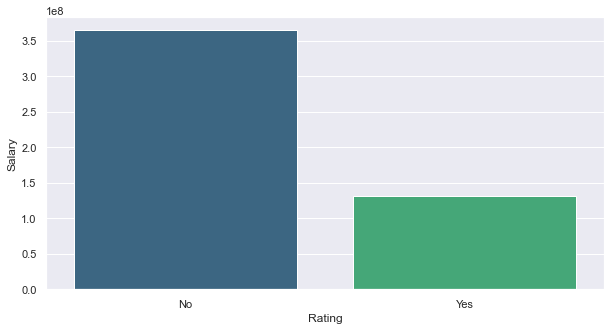

In [144]:
#we are using groupby function to get the required output

b = df.groupby('Rating').sum().sort_values('Salary', ascending = False)

plt.figure(figsize = (10 , 5))

#we are plotting barplot to get rating over salary

sns.barplot(x = b.index, y = b['Salary'], palette = 'viridis')

People doesn't get any rating got higher salary beacause as we see earlier most of the employees doesn't get any rating.

<AxesSubplot:xlabel='Billing', ylabel='Salary'>

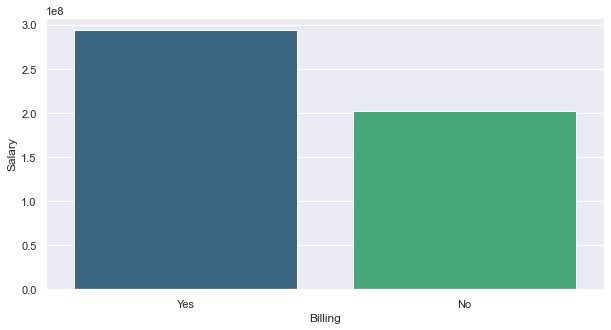

In [149]:
#we are using groupby function to get the required output

b = df.groupby('Billing').sum().sort_values('Salary', ascending = False)

plt.figure(figsize = (10 , 5))

#we are plotting barplot to get Billing over salary

sns.barplot(x = b.index, y = b['Salary'], palette = 'viridis')

Employees whose getting billing got higher salaries.

<AxesSubplot:xlabel='Calls', ylabel='Salary'>

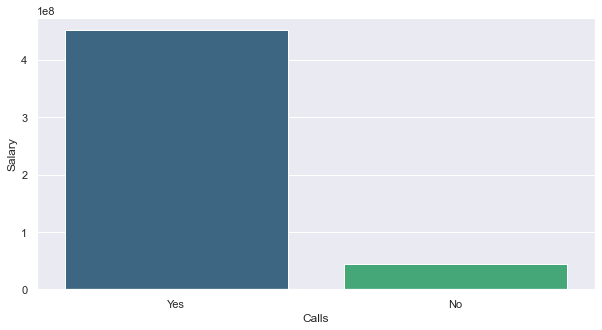

In [150]:
#we are using groupby function to get the required output

b = df.groupby('Calls').sum().sort_values('Salary', ascending = False)

plt.figure(figsize = (10 , 5))

#we are plotting barplot to get calls over salary

sns.barplot(x = b.index, y = b['Salary'], palette = 'viridis')

Employees attending calls are getting higher salaries.

### Feature Selection 

In [103]:
df.head(2)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,...,low,Unit_Sales,Total_Sales,Months,Education,unitprice_log,volume_log,openingbalance_log,closingbalance_log,low_log
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,...,3.65,18.25,18.80,0,High School or less,1.327075,16.870766,1.321756,1.324419,1.294727
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,...,3.65,18.40,18.85,0,High School or less,1.319086,16.163337,1.348073,1.302913,1.294727


I'm going to drop unit price, volume, openingbalance,closingbalance,low cloumns because I've log transformed those columns and 
I'm going to use those in the model.

I'm even dropping business, dependancies, Calls type, billing, Gender, Rating, Age, openingbalance log, closingbalance log, volume log  columns because these are less correlated to target variable.

In [105]:
df2 = df.drop(['Unit_Price','Volume','openingbalance','closingbalance','low', 'Gender','Age','Rating','Calls', 'volume_log',
               'Business','Dependancies','Type','Billing','openingbalance_log','closingbalance_log'], axis = 1)

df2.head()

,Salary,Base_pay,Bonus,Unit_Sales,Total_Sales,Months,Education,unitprice_log,low_log
0,5089.00,2035.600,254.4500,18.25,18.80,0,High School or less,1.327075,1.294727
1,5698.12,2279.248,284.9060,18.40,18.85,0,High School or less,1.319086,1.294727
2,5896.65,2358.660,294.8325,18.70,18.90,0,High School or less,1.358409,1.313724
3,6125.12,2450.048,306.2560,18.75,19.00,0,High School or less,1.470176,1.342865
4,6245.00,2498.000,312.2500,18.80,19.05,1,High School or less,1.467874,1.406097


we can't use categorical variables in model building.

So, I'm using label encoder to change them to numeric.

In [109]:
#importing label encoder from sklearn

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

#transforming Gender column to numeric.

df2["Education"]=le.fit_transform(df2["Education"])

In [110]:
#after doing the encoding I'm going to check the dataset for that I have used head function

df2.head()

,Salary,Base_pay,Bonus,Unit_Sales,Total_Sales,Months,Education,unitprice_log,low_log
0,5089.00,2035.600,254.4500,18.25,18.80,0,1,1.327075,1.294727
1,5698.12,2279.248,284.9060,18.40,18.85,0,1,1.319086,1.294727
2,5896.65,2358.660,294.8325,18.70,18.90,0,1,1.358409,1.313724
3,6125.12,2450.048,306.2560,18.75,19.00,0,1,1.470176,1.342865
4,6245.00,2498.000,312.2500,18.80,19.05,1,1,1.467874,1.406097


We got clean dataset we can further go for model building

For model building we have to divide our dataset into dependent and independent variables.

Our dependent variable is salary. except salary remaing are independent variables.

In [111]:
#I have used loc function to get independent variables except salary

X = df2.loc[:, df2.columns != 'Salary'].values

X

array([[2.03560000e+03, 2.54450000e+02, 1.82500000e+01, ...,
        1.00000000e+00, 1.32707500e+00, 1.29472717e+00],
       [2.27924800e+03, 2.84906000e+02, 1.84000000e+01, ...,
        1.00000000e+00, 1.31908561e+00, 1.29472717e+00],
       [2.35866000e+03, 2.94832500e+02, 1.87000000e+01, ...,
        1.00000000e+00, 1.35840916e+00, 1.31372367e+00],
       ...,
       [7.22787200e+04, 8.38105496e+03, 1.16800000e+02, ...,
        3.00000000e+00, 5.73657230e+00, 5.72126217e+00],
       [6.12355124e+04, 8.44872640e+03, 1.16850000e+02, ...,
        3.00000000e+00, 5.74460447e+00, 5.72814981e+00],
       [6.76598828e+04, 8.45748535e+03, 1.17150000e+02, ...,
        3.00000000e+00, 5.73547493e+00, 5.71300647e+00]])

In [112]:
#I have inserted salary to dependent variable

Y = df2['Salary'].values

Y

array([  5089.    ,   5698.12  ,   5896.65  , ..., 167621.0992,
       168974.528 , 169149.707 ])

after dividing varibles we are splitting it to test train

In [113]:
#importing test train split library

from sklearn.model_selection import train_test_split

#we are giving test size as 0.33

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [116]:
Y_train

array([ 64562.68488, 147745.9923 ,  76788.11394, ..., 108183.8872 ,
       117694.4052 ,  78166.51058])

In [117]:
Y_test

array([128607.2106 ,  65645.48513,  83002.50541, ...,  26351.54003,
        40619.95794,  76951.75632])

### Feature Scaling 

In [152]:
#importing standard scaler to scale the variables

from sklearn.preprocessing import StandardScaler  

#initializing the standard scaler

Scale=StandardScaler() 

#fitting our X_train to standard scaler

X_train=Scale.fit_transform(X_train)

#fitting X_test to standard scaler

X_test=Scale.transform(X_test)                                       

In [153]:
X_train

array([[-1.44497324, -1.45021244, -1.53314546, ...,  0.8126041 ,
         0.43509881, -1.39864169],
       [ 2.08024772,  1.92098655,  1.55829331, ...,  0.8126041 ,
         1.69559507,  1.97943182],
       [-0.95218148, -0.9547482 , -1.49954286, ..., -1.24032299,
        -1.16065966, -1.02101713],
       ...,
       [ 0.31334288,  0.31763928,  0.4964513 , ..., -1.24032299,
         0.04428081,  0.19075209],
       [ 0.69669996,  0.70307537,  0.83583751, ..., -1.24032299,
         0.40645863,  0.63388935],
       [-0.89662004, -0.89888544, -1.38529404, ..., -1.24032299,
        -0.80431176, -0.93797732]])

In [154]:
X_test

array([[ 1.1365815 ,  1.14534245,  1.17522372, ...,  0.8126041 ,
         0.94034174,  1.18502963],
       [-1.40132691, -1.40632941, -1.53146533, ..., -1.24032299,
        -1.34578175, -1.39287755],
       [-0.70168713, -0.70289538, -1.17695795, ...,  0.8126041 ,
        -0.88089275, -0.7905039 ],
       ...,
       [-2.9852167 , -2.99880887, -1.55498715, ..., -1.24032299,
        -2.55790303, -2.48181522],
       [-2.41007462, -2.4205477 , -1.55330702, ..., -1.24032299,
        -2.38512613, -2.30665934],
       [-0.94558526, -0.94811621, -1.4961826 , ..., -1.24032299,
         0.81992593, -1.02319087]])

The dependent variable is numeric so I'm going to use regression model.

We have single dependent and multiple independent variables so i'm going to use multiple linear regression model.

Our data satisfies all the assumption of linear regression so I have chosen linear regression.

In [155]:
#importing linear regression from sklearn

from sklearn.linear_model import LinearRegression

regressor= LinearRegression() 

#Fitting the MLR model to the training set:
regressor.fit(X_train, Y_train)  



LinearRegression()

In [160]:
y_pred = regressor.predict(X_test)

#created a dataframe for comparison bw actual and predicted

reg_comparision= pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})

reg_comparision

,Actual,Predicted
0,128607.21060,128607.210600
1,65645.48513,65645.485134
2,83002.50541,83002.505416
3,131396.35010,131396.350101
4,75671.94366,75671.943654
...,...,...
1633,98366.85111,98366.851118
1634,140554.10290,140554.102900
1635,26351.54003,26351.540039
1636,40619.95794,40619.957937


I'm going to use r2 score for model evaluation

In [169]:
#importing metrics from sklearn

from sklearn import metrics 

 #function for score calc.
    
def scores(y, y_):
    
    #adjusted r2 score
    
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_))*(len(y)-1)/(len(y)-X.shape[1]-1)))
    
    #r2 score
    
    print('r square  ', metrics.r2_score(y, y_))     
    

In [170]:
 scores(Y_test,y_pred)

Adjusted r square:1.0
r square   1.0


r2 score is 1.0 it means our model is good.

### Random forest regressor

In [172]:
#importing randomforest regressor from sklearn

from sklearn.ensemble import RandomForestRegressor 

#initializing rvf
rvf = RandomForestRegressor() 

#fitting our model with the train data
rvf.fit(X_train, Y_train)                           

RandomForestRegressor()

In [173]:
 #prediction using rvf model with test data

y_pred = rvf.predict(X_test)

#regression score from rvf with test and predicted value

scores(Y_test,y_pred)                               

Adjusted r square:0.9999727578353651
r square   0.9999728909675075


### Conclusion

AS we see here in this case both linear regression and random forest both works efficient because of powerful algorithms.